# 1a. Data Preparation and Preprocessing

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
image_dir = '../images' ## Note: Check where xxx.jpg is stored
image_paths = os.listdir(image_dir)

print(image_paths[:2]) ## Expected Output: ['20171205-123822-2.jpg', '20180322-125604-1.jpg']

['20180112-072012-1.jpg', '20171218-115947-3.jpg']


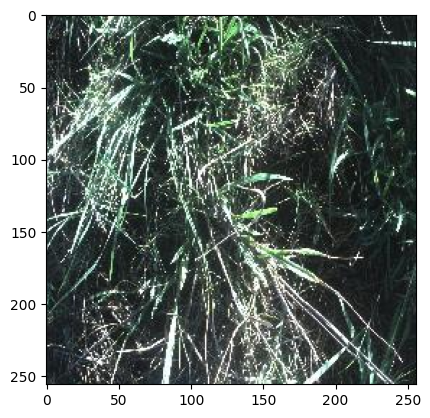

In [4]:
## (Re)run this cell to test if dataset is loaded properly (this cell displays the first image of the dataset)

img_path = os.path.join(image_dir, image_paths[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# 1b. Simple Data Exploration and Visualisation

In [3]:
import pandas as pd

In [7]:
labels_df = pd.read_csv('../labels.csv') ## Note: Check where labels.csv is stored
print(labels_df.head()) ## Expected Output: A 5x5 table with [Filename, Label, Species] as column headings
unique_species = labels_df['Species'].unique()
print(unique_species) ## Expected Output: ['Chinee apple' 'Lantana' 'Negative' 'Snake weed' 'Siam weed' 'Prickly acacia' 'Parthenium' 'Rubber vine' 'Parkinsonia']

                Filename  Label       Species
0  20160928-140314-0.jpg      0  Chinee apple
1  20160928-140337-0.jpg      0  Chinee apple
2  20160928-140731-0.jpg      0  Chinee apple
3  20160928-140747-0.jpg      0  Chinee apple
4  20160928-141107-0.jpg      0  Chinee apple
['Chinee apple' 'Lantana' 'Negative' 'Snake weed' 'Siam weed'
 'Prickly acacia' 'Parthenium' 'Rubber vine' 'Parkinsonia']


In [8]:
def f1(species_name, num_images=3):
    species_df = labels_df[labels_df['Species'] == species_name]

    fig, axes = plt.subplots(1, num_images, figsize=(8, 2))

    for i, (index, row) in enumerate(species_df.head(num_images).iterrows()):
        img_path = os.path.join(image_dir, row['Filename']) ## Check image_dir
        img = cv2.imread(img_path)

        if img is not None:
            axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f"{row['Species']}")
            axes[i].axis('off')

    plt.show()

Displaying images for: Chinee apple


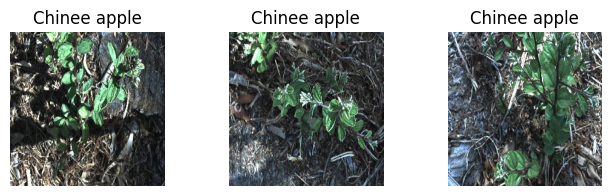

Displaying images for: Lantana


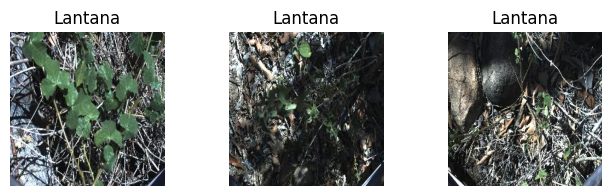

Displaying images for: Negative


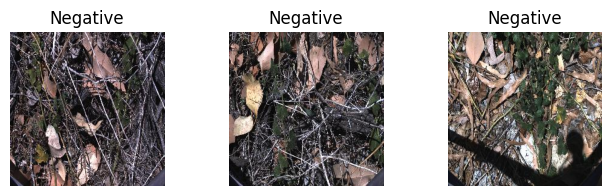

Displaying images for: Snake weed


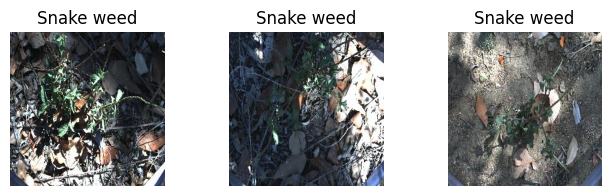

Displaying images for: Siam weed


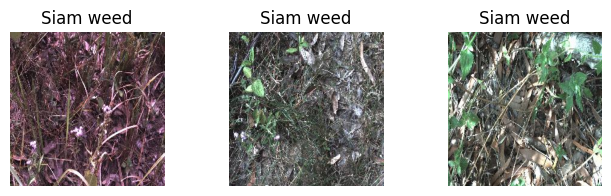

Displaying images for: Prickly acacia


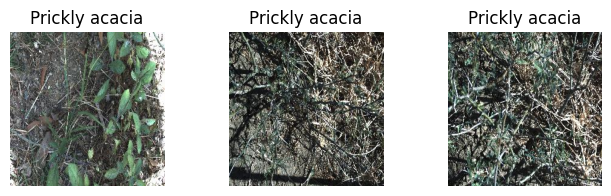

Displaying images for: Parthenium


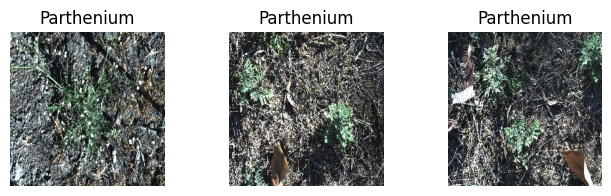

Displaying images for: Rubber vine


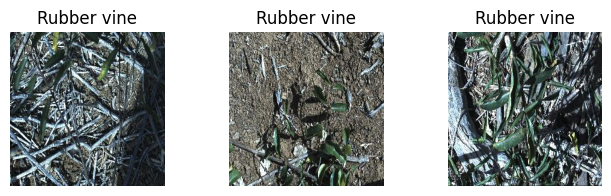

Displaying images for: Parkinsonia


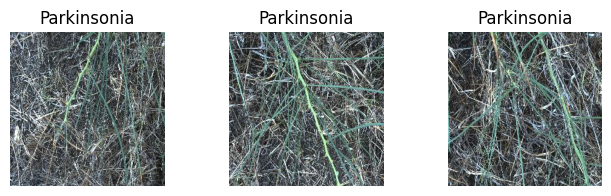

In [9]:
for species in unique_species:
    print(f"Displaying images for: {species}")
    f1(species_name=species, num_images=3)

# 1c. Simple Image Processing



There are a few ways we can do image processing, one way we can do image processing is by using histogram equalisation.

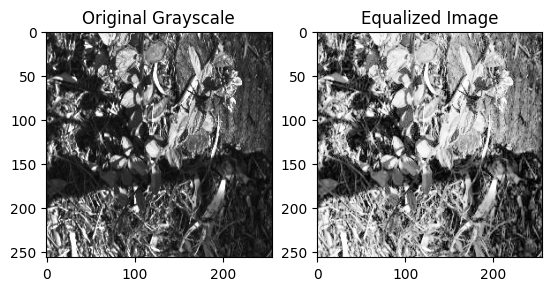

In [12]:
img_path = '../images/20160928-140314-0.jpg'

img = cv2.imread(img_path)

## Step 1: Convert image to grayscale (this reduces complexity while retaining essential features)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Step 2: Apply histogram equalization (this is used to enhance contrast in plant images)

equalized_img = cv2.equalizeHist(gray_img)

## Step 3: Display original and equalised images
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale')

plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

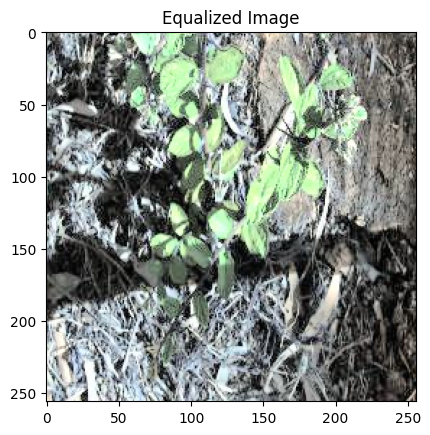

In [13]:
img_path = '../images/20160928-140314-0.jpg'

## Step 1: Convert the image to YUV colour space
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

## Step 2: Equalize the histogram of the Y channel (i.e. enhancing the contrast of luminance component of the image while keeping the chrominance intact)
yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])

## Step 3: Convert back to BGR colour space
equalized_img = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

## Display the equalised colour image
plt.imshow(equalized_img)
plt.title('Equalized Image')
plt.show()

In [15]:
def f2(species_name):
   # Get one image from the species
    species_df = labels_df[labels_df['Species'] == species_name]
    img_path = os.path.join(image_dir, species_df.iloc[0]['Filename'])

    # Load the image
    img = cv2.imread(img_path)

    # Grayscale histogram equalization
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized_gray = cv2.equalizeHist(gray_img)

    # Color histogram equalization (only on Y channel)
    yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])
    equalized_color = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

    # Display the original, grayscale equalized, and color equalized images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original: {species_name}")

    plt.subplot(1, 3, 2)
    plt.imshow(equalized_gray, cmap='gray')
    plt.title("Grayscale Histogram Equalization")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB))
    plt.title("Color Histogram Equalization")

    plt.show()

Processing species: Chinee apple


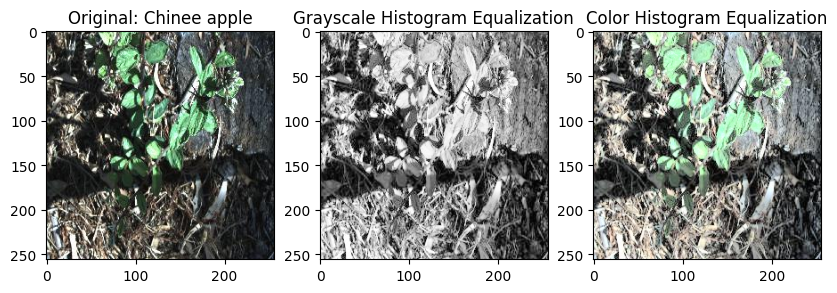

Processing species: Lantana


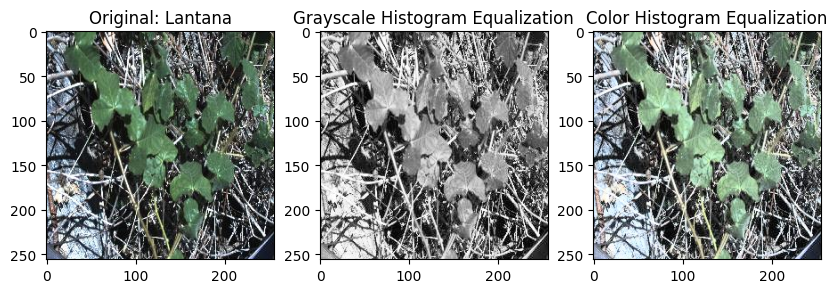

Processing species: Negative


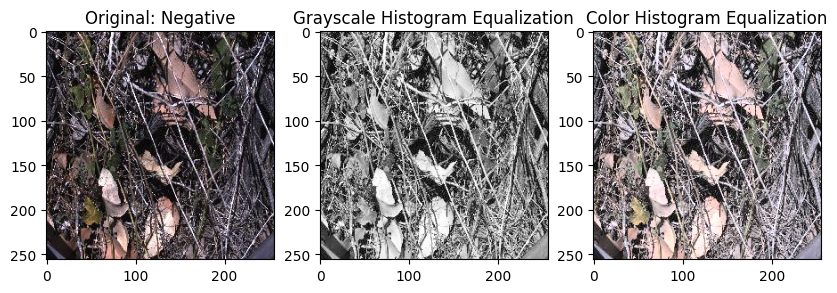

Processing species: Snake weed


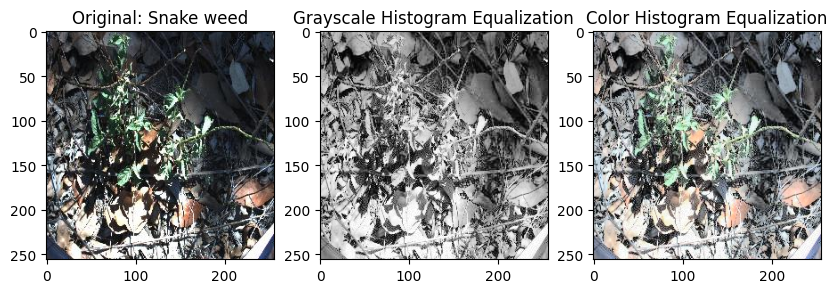

Processing species: Siam weed


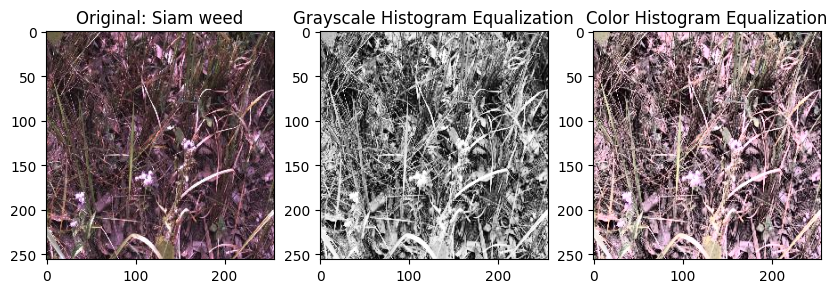

Processing species: Prickly acacia


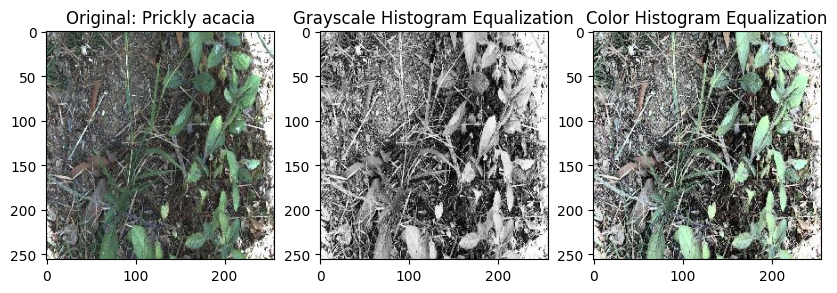

Processing species: Parthenium


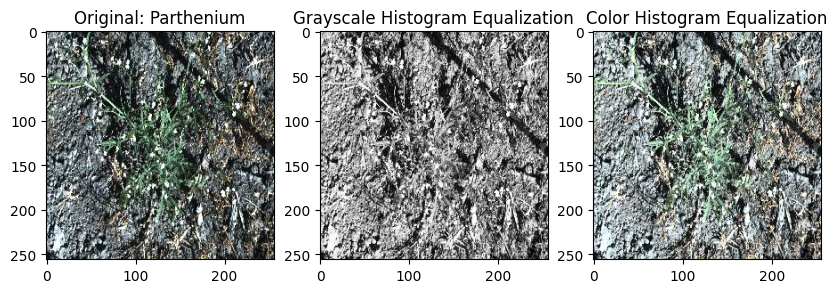

Processing species: Rubber vine


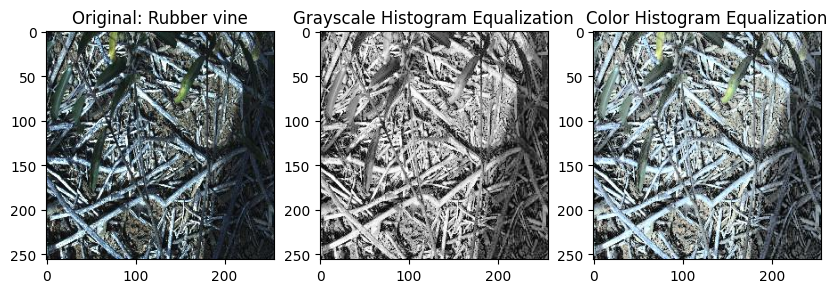

Processing species: Parkinsonia


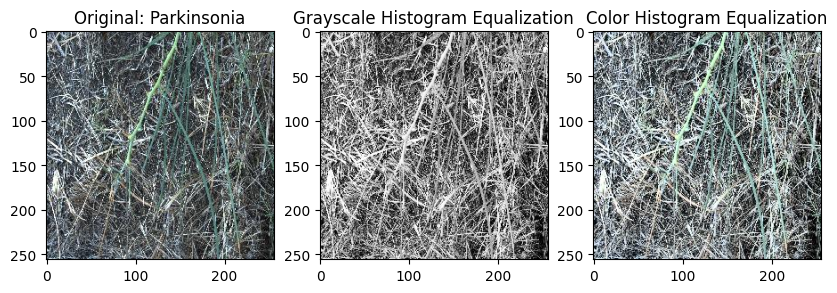

In [16]:
for species in unique_species:
    print(f"Processing species: {species}")
    f2(species)

Another way we can do image processing is by using fourier transforms, more specifically, through the use of DCT. The DCT is a good approximation to optimal KL decomposition of nature image statistics over small patches, which can be obtained by performing PCA of images.

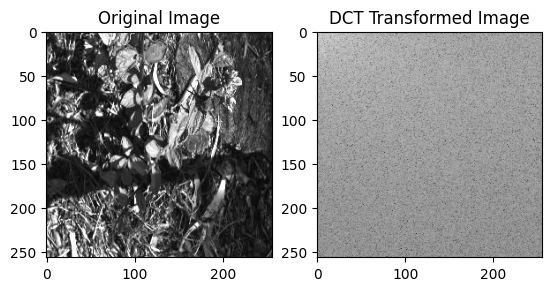

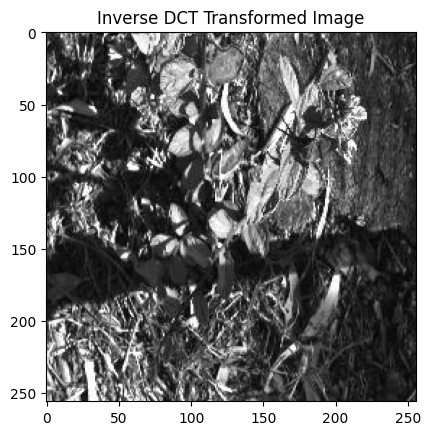

In [22]:
img_path = '../images/20160928-140314-0.jpg'

img = cv2.imread(img_path, 0)

## Step 1: Apply DCT
dct_img = cv2.dct(np.float32(img))

## Step 2: Display DCT transformed image
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(np.log(np.abs(dct_img)), cmap='gray'), plt.title('DCT Transformed Image')
plt.show()

## Step 3: Inverse DCT to recover the image
idct_img = cv2.idct(dct_img)

## Step 4: Display inverse DCT transformed image
plt.imshow(np.uint8(idct_img), cmap='gray'), plt.title('Inverse DCT Transformed Image')
plt.show()

# 2a. Simple Training Model: Logistic Regression in Python
This simple training model preprocesses images using DCT (grayscale), this section will take a while to execute (edit: I have changed max_iter to 1 for fast execution since the purpose of this section is to build a simple training model).

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ## Building a simple ML classification model

In [1]:
def f3(img_path, size=(128,128), dct=True):
  img = cv2.imread(img_path, 0) ## Load image as grayscale
  img = cv2.resize(img, size) ## Resize image

  if dct:
    img = cv2.dct(np.float32(img)) ## Apply DCT
  img = img.flatten()
  img = img / 255.0 ## Normalize pixel values

  return img

In [ ]:
# Load the labels
labels_df = pd.read_csv('../labels.csv')

X = []  # Feature vectors
y = []  # Labels

# Load images and preprocess them
for i, row in labels_df.iterrows():
    img_path = os.path.join('../images', row['Filename'])
    img_preprocessed = f3(img_path)
    X.append(img_preprocessed)
    y.append(row['Label'])

X = np.array(X)
y = np.array(y)


[0 0 0 ... 8 8 8]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1)
clf.fit(X_train, y_train)


## Simple Evaluation of Sample Training Model using Logistic Regression
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 52.43%


/Users/ichaeyeon/Desktop/weed_classification/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2b. Improvements to Simple Training Model

Seen in 2a, the accuracy of using a simple training model is about 52%. With respect to our [project proposal](https://docs.google.com/document/d/1gaJEVzbwpgH0FTm-02aU4aj0g4_BQAuVSoLqfFswAwo/edit?usp=sharing), we wish to improve this accuracy to at least 90%.

In 1b, we performed a simple data exploration and visualisation to understand

---

what the DeepWeeds dataset is all about. In 3a, we will begin our ML pipeline proper. Referring to 08a.3 (ML pipeline), we will first conduct data preprocessing more vigorously.

# 3a. Advanced Data Preprocessing


## Step 1: Check for imbalanced data.


Number of images per class:
Species
Negative          9106
Chinee apple      1125
Siam weed         1074
Lantana           1064
Prickly acacia    1062
Parkinsonia       1031
Parthenium        1022
Snake weed        1016
Rubber vine       1009
Name: count, dtype: int64


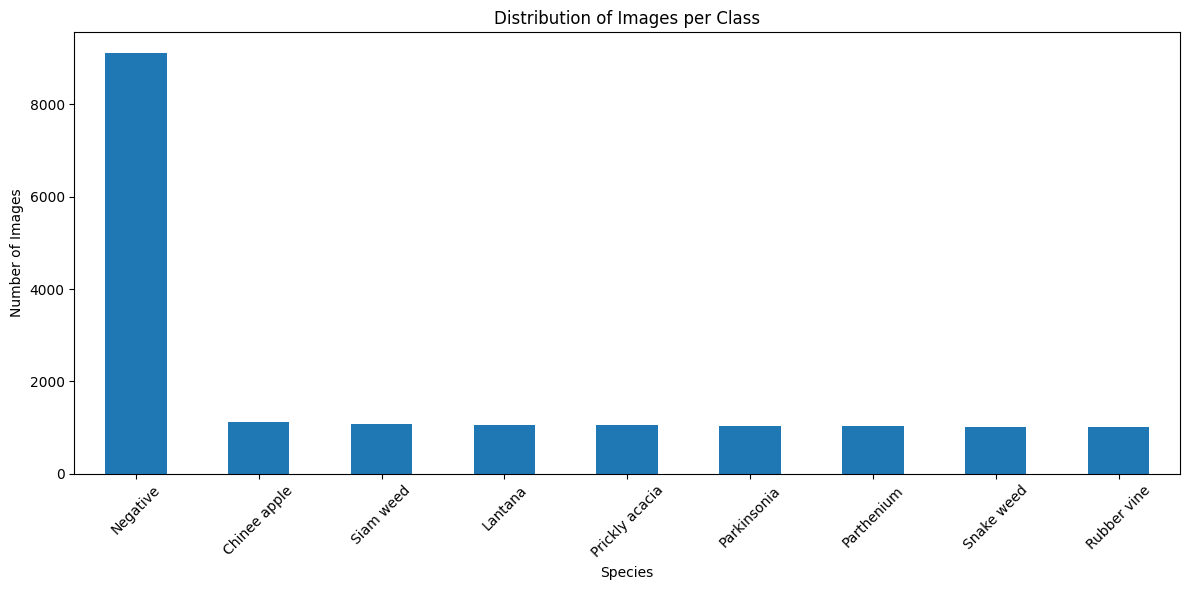

In [36]:
# Count the number of images per class
class_counts = labels_df['Species'].value_counts()

# Display the counts
print("Number of images per class:")
print(class_counts)

# Plot the distribution of images per class
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of Images per Class')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Realise that there is a significant imbalance in the dataset, where the 'Negative' class is highly overrepresented compared to other species. In this light, we can consider several approaches.

1. Apply resampling techniques (e.g. duplicate images from minority classes to balance the dataset, reduce the number of samples from the majority class)
2. Use GANs to create synthetic images for underrepresented classes, enriching the dataset diversity.

## Original Image Processing Strategy (DCT) + Mitigation Technique 1 (SMOTE)

We will use Synthetic Minority Over-sampling Technique (SMOTE) in hopes to balance the data! In addition, in the image processing step, we will apply Gaussian smoothing before applying DCT in hopes for better image preprocessing.

Justification for DCT: It is a good approximation of KL decomposition (PCA) for natural image statistics, it captures significant features of images in a compact form, which is useful for tasks like feature extraction.

Edit: There are issues with DCT, consider a new image processing strategy.





In [ ]:
# Step 1: Import Required Libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from collections import Counter

# Step 2: Define the Image Preprocessing Function with Gaussian Smoothing and DCT
def f3(img_path, size=(128, 128), dct=True, kernel_size=(5, 5)):
    img = cv2.imread(img_path, 0)  # Load image as grayscale
    if img is None:
        print(f"Warning: Unable to read image at {img_path}")
        return None  # Return None if the image cannot be read

    # Display the original image before any preprocessing
    plt.imshow(img, cmap='gray')
    plt.title(f"Original Image: {img_path}")
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, size)  # Resize image
    print(f"Image loaded and resized: {img_path}, Min value: {np.min(img)}, Max value: {np.max(img)}")  # Debug output

    # Apply Gaussian Smoothing
    img = cv2.GaussianBlur(img, kernel_size, 0)
    print(f"Gaussian smoothing applied: {img_path}, Min value after smoothing: {np.min(img)}, Max value after smoothing: {np.max(img)}")  # Debug output

    if dct:
        img = cv2.dct(np.float32(img))  # Apply DCT
        print(f"DCT applied: {img_path}, Min value after DCT: {np.min(img)}, Max value after DCT: {np.max(img)}")  # Debug output

        # Display the image after DCT for visual comparison
        plt.imshow(img, cmap='gray')
        plt.title(f"DCT Image: {img_path}")
        plt.axis('off')
        plt.show()

        # Normalize DCT output for better visualization
        if np.max(img) != np.min(img):  # Prevent division by zero
            img = (img - np.min(img)) / (np.max(img) - np.min(img))
        else:
            img = img / 255.0  # Default normalization if range is zero
        print(f"DCT normalized: {img_path}, Min value after normalization: {np.min(img)}, Max value after normalization: {np.max(img)}")  # Debug output

    img = img.flatten()  # Flatten the image
    return img

# Step 3: Load Image Paths and Labels
image_dir = '../images'
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.jpg', '.png'))]

# Load the labels DataFrame
labels_df = pd.read_csv('../labels.csv')  # Replace with the actual path to your CSV file
y = labels_df['Species'].values  # Ensure this matches the column name for your labels

# Encode labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Preprocess Images and Filter Out None Results
preprocessed_images = [result for result in (f3(path) for path in image_paths) if result is not None]
preprocessed_images = np.array(preprocessed_images)

# Ensure that the number of images matches the number of labels
if len(preprocessed_images) != len(y):
    raise ValueError("Mismatch between the number of preprocessed images and labels.")

print("Shape of preprocessed_images:", preprocessed_images.shape)

# Step 5: Apply SMOTE for Balancing the Data
X = preprocessed_images  # Already flattened by f3

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Reshape the resampled images back to original dimensions (128, 128)
image_height, image_width = 128, 128  # The size used in f3
X_resampled_images = X_resampled.reshape(X_resampled.shape[0], image_height, image_width)

# Check the new class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Debug: Check the shape and pixel value range of the resampled images
print("Shape of X_resampled_images:", X_resampled_images.shape)
print("Min value in resampled images:", np.min(X_resampled_images))
print("Max value in resampled images:", np.max(X_resampled_images))

# Step 6: Visualize a Few Synthetic Samples with Debugging Information
for i in range(5):
    plt.imshow(X_resampled_images[i], cmap='gray', vmin=0, vmax=1)  # Use 'gray' for grayscale images and set vmin/vmax
    plt.title(f"Class: {label_encoder.inverse_transform([y_resampled[i]])[0]}")
    plt.axis('off')
    plt.show()

    # Print min and max values for each visualized image
    print(f"Visualized image {i} - Min value: {np.min(X_resampled_images[i])}, Max value: {np.max(X_resampled_images[i])}")


## New Image Processing Strategy (CLAHE) + Mitigation Technique 1 (SMOTE)







In [ ]:
# Step 1: Import Required Libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from collections import Counter

# Step 2: Define the Image Preprocessing Function with Image Display
def f3(img_path, size=(128, 128), apply_clahe=True, kernel_size=(5, 5)):
    img = cv2.imread(img_path, 0)  # Load image as grayscale
    if img is None:
        print(f"Warning: Unable to read image at {img_path}")
        return None  # Return None if the image cannot be read

    # Display the original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    img = cv2.resize(img, size)  # Resize image
    print(f"Image loaded and resized: {img_path}, Min value: {np.min(img)}, Max value: {np.max(img)}")

    # Display resized image
    plt.subplot(1, 4, 2)
    plt.imshow(img, cmap='gray')
    plt.title('Resized Image')
    plt.axis('off')

    # Apply Gaussian Smoothing
    img = cv2.GaussianBlur(img, kernel_size, 0)
    print(f"Gaussian smoothing applied: {img_path}, Min value after smoothing: {np.min(img)}, Max value after smoothing: {np.max(img)}")

    # Display image after Gaussian smoothing
    plt.subplot(1, 4, 3)
    plt.imshow(img, cmap='gray')
    plt.title('After Gaussian Blur')
    plt.axis('off')

    # Apply CLAHE (Adaptive Histogram Equalization)
    if apply_clahe:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img = clahe.apply(img)
        print(f"CLAHE applied: {img_path}, Min value after CLAHE: {np.min(img)}, Max value after CLAHE: {np.max(img)}")

        # Display image after CLAHE
        plt.subplot(1, 4, 4)
        plt.imshow(img, cmap='gray')
        plt.title('After CLAHE')
        plt.axis('off')

    img = img / 255.0  # Normalize pixel values
    print(f"Image normalized: {img_path}, Min value after normalization: {np.min(img)}, Max value after normalization: {np.max(img)}")

    plt.tight_layout()
    plt.show()

    img = img.flatten()  # Flatten the image
    return img

# Step 3: Load Image Paths and Labels
image_dir = 'images'
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.jpg', '.png'))]

# Load the labels DataFrame
labels_df = pd.read_csv('labels/labels.csv')  # Replace with the actual path to your CSV file
y = labels_df['Species'].values  # Ensure this matches the column name for your labels

# Encode labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Preprocess Images and Filter Out None Results
preprocessed_images = [result for result in (f3(path) for path in image_paths) if result is not None]
preprocessed_images = np.array(preprocessed_images)

# Ensure that the number of images matches the number of labels
if len(preprocessed_images) != len(y):
    raise ValueError("Mismatch between the number of preprocessed images and labels.")

print("Shape of preprocessed_images:", preprocessed_images.shape)

# Step 5: Apply SMOTE for Balancing the Data
X = preprocessed_images  # Already flattened by f3

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Reshape the resampled images back to original dimensions (128, 128)
image_height, image_width = 128, 128  # The size used in f3
X_resampled_images = X_resampled.reshape(X_resampled.shape[0], image_height, image_width)

# Check the new class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Debug: Check the shape and pixel value range of the resampled images
print("Shape of X_resampled_images:", X_resampled_images.shape)
print("Min value in resampled images:", np.min(X_resampled_images))
print("Max value in resampled images:", np.max(X_resampled_images))

# Step 6: Visualize a Few Synthetic Samples with Debugging Information
for i in range(5):
    plt.imshow(X_resampled_images[i], cmap='gray', vmin=0, vmax=1)  # Use 'gray' for grayscale images and set vmin/vmax
    plt.title(f"Class: {label_encoder.inverse_transform([y_resampled[i]])[0]}")
    plt.axis('off')
    plt.show()

    # Print min and max values for each visualized image
    print(f"Visualized image {i} - Min value: {np.min(X_resampled_images[i])}, Max value: {np.max(X_resampled_images[i])}")


## not organised (old feature engingering stuff)

We can first visualize the RGB distribution of the equalized image using a colour histogram

In [ ]:
# load image
imageObj = equalized_img
# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

# Get RGB data from image
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])

# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")

plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")

plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")

# for clear view
plt.tight_layout()
plt.show()

We can now proceed to create a matrix which will store the RGB distribution of all the images in the dataset

In [ ]:
## code for making a matrix for RGB distribution for each image and storing it in an array

mean shift clustering

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# 1. Load the image
image = equalized_img
image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)  # Convert to LUV color space

# 2. Reshape the image for clustering (each pixel is a data point)
pixels = image.reshape(-1, 3)  # Reshape to (num_pixels, 3)

# 3. Use only L and U channels (dimensionality reduction)
lu_pixels = pixels[:, :2]  # Select the L and U components

# 4. Estimate bandwidth for mean-shift clustering
bandwidth = estimate_bandwidth(lu_pixels, quantile=0.2, n_samples=500)

# 5. Run mean-shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(lu_pixels)
labels = mean_shift.labels_

# 6. Reshape the labels to the original image shape
segmented_image = labels.reshape(image.shape[:2])

# 7. Visualize the segmented image (optional edge detection for boundaries)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image (Clusters)")
plt.imshow(segmented_image, cmap='nipy_spectral')  # Cluster visualization
plt.axis('off')

plt.show()

We can now proceed to do the same mean shift clustering for all the images

In [ ]:
# Load the labels
labels_df = pd.read_csv('labels/labels.csv')

X_msc = []  # Feature vectors
y_msc = []  # Labels

# Load images and preprocess them
for i, row in labels_df.iterrows():
    img_path = os.path.join('images', row['Filename'])


    # 1. Load the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)  # Convert to LUV color space


    yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])
    equalized_color = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

  # 2. Reshape the image for clustering (each pixel is a data point)
    pixels = equalized_color.reshape(-1, 3)  # Reshape to (num_pixels, 3)

  # 3. Use only L and U channels (dimensionality reduction)
    lu_pixels = pixels[:, :2]  # Select the L and U components

  # 4. Estimate bandwidth for mean-shift clustering
    bandwidth = estimate_bandwidth(lu_pixels, quantile=0.2, n_samples=500)

  # 5. Run mean-shift clustering
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    mean_shift.fit(lu_pixels)
    labels = mean_shift.labels_

  # 6. Reshape the labels to the original image shape
    segmented_image = labels.reshape(equalized_color.shape[:2])

    X_msc.append(segmented_image)
    y_msc.append(row['Label'])

X_msc = np.array(X_msc)
y_msc = np.array(y_msc)

PCA

In [ ]:
from sklearn.decomposition import PCA

image = equalized_img
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# 2. Reshape the image into 2D array (pixels × channels)
original_shape = image.shape
pixels = image.reshape(-1, 3)  # (num_pixels, 3)

# 3. Apply PCA to reduce the 3 color channels to 2 principal components
pca = PCA(n_components=2)
pixels_reduced = pca.fit_transform(pixels)  # Shape: (num_pixels, 2)

# 4. Reconstruct the image with the reduced components
pixels_restored = pca.inverse_transform(pixels_reduced)  # Shape: (num_pixels, 3)
image_restored = pixels_restored.reshape(original_shape).astype(np.uint8)

# 5. Display the Original and PCA-Compressed Image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("PCA-Compressed Image (2 Components)")
plt.imshow(image_restored)
plt.axis('off')

plt.show()

PCA for all image

In [30]:
# Load the labels
labels_df = pd.read_csv('../labels.csv')

X_pca = []  # Feature vectors
y_pca = []  # Labels

# Load images and preprocess them
for i, row in labels_df.iterrows():
    img_path = os.path.join('images', row['Filename'])


    # 1. Load the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)  # Convert to LUV color space

    yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])
    equalized_color = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

    original_shape = equalized_color.shape
    pixels = equalized_color.reshape(-1, 3)  # (num_pixels, 3)

    # 3. Apply PCA to reduce the 3 color channels to 2 principal components
    pca = PCA(n_components=2)
    pixels_reduced = pca.fit_transform(pixels)  # Shape: (num_pixels, 2)

    # 4. Reconstruct the image with the reduced components
    pixels_restored = pca.inverse_transform(pixels_reduced)  # Shape: (num_pixels, 3)
    image_restored = pixels_restored.reshape(original_shape).astype(np.uint8)



    X_pca.append(image_restored)
    y_pca.append(row['Label'])

X_pca = np.array(X_pca)
y_pca = np.array(y_pca)

[ WARN:0@37586.453] global loadsave.cpp:241 findDecoder imread_('images/20160928-140314-0.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
